# RNNs with PyTorch

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.pi

3.141592653589793

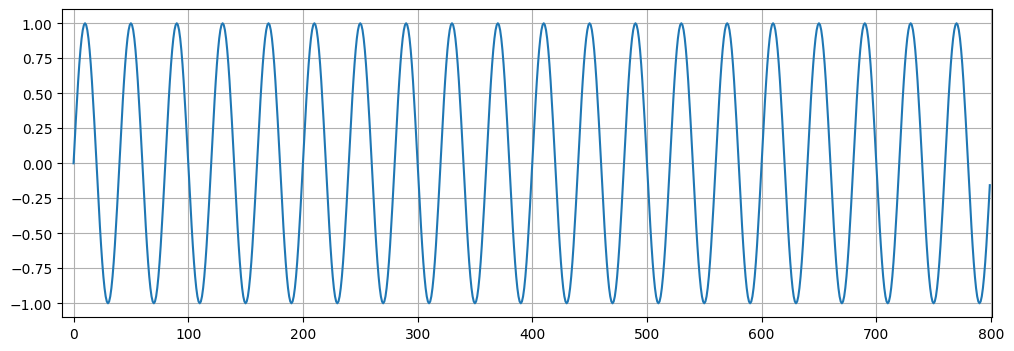

In [3]:
x = torch.linspace(0, 799, 800)
y = torch.sin(x*2*np.pi/40)
plt.figure(figsize=(12,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(y.numpy());

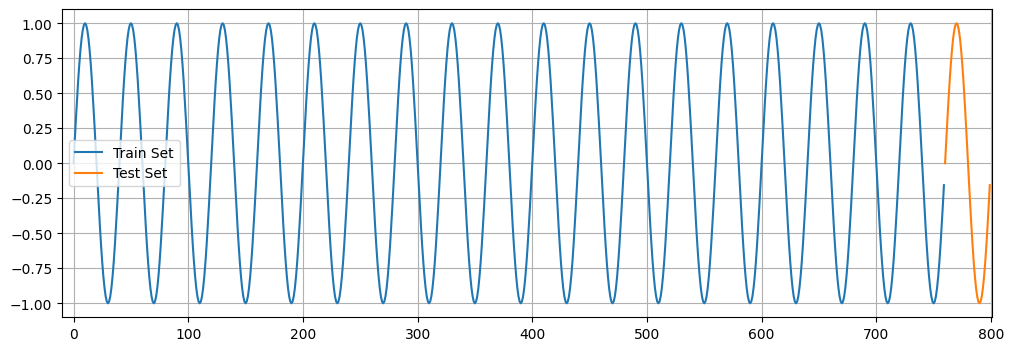

In [5]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]
plt.figure(figsize=(12,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(x[:-test_size], train_set.numpy(), label = "Train Set");
plt.plot(x[-test_size:], test_set.numpy(), label = "Test Set");
plt.legend();

In [7]:
def input_data(seq, ws):
    out = [] # ([0,1,2,3],[4]), ([1,2,3,4],[5])
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
    return out

In [8]:
window_size = 40

train_data = input_data(train_set, window_size)

In [9]:
len(train_data)

720

In [10]:
class LSTM(nn.Module):
    def __init__(self, input_size = 1, hidden_size = 50, out_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, out_size)
        self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))
    
    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq), -1))
        return pred[-1]

In [16]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)

In [12]:
model.eval()

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 1/10 Loss: 0.09209897369146347
Performance on test range: 0.6073052287101746


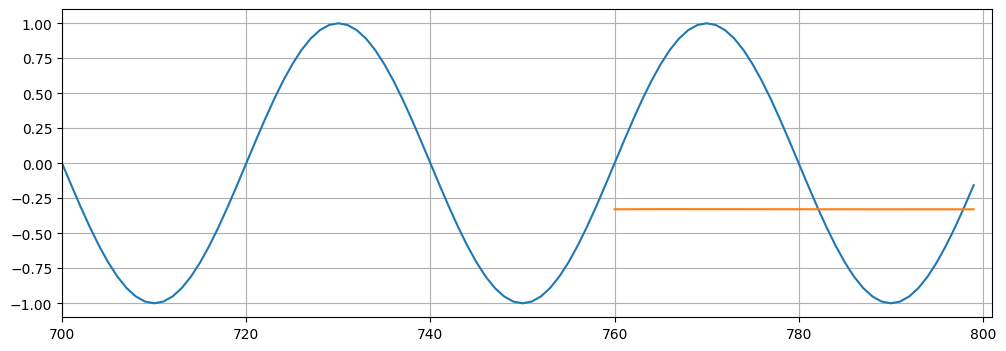

Epoch 2/10 Loss: 0.06505247950553894
Performance on test range: 0.5652278661727905


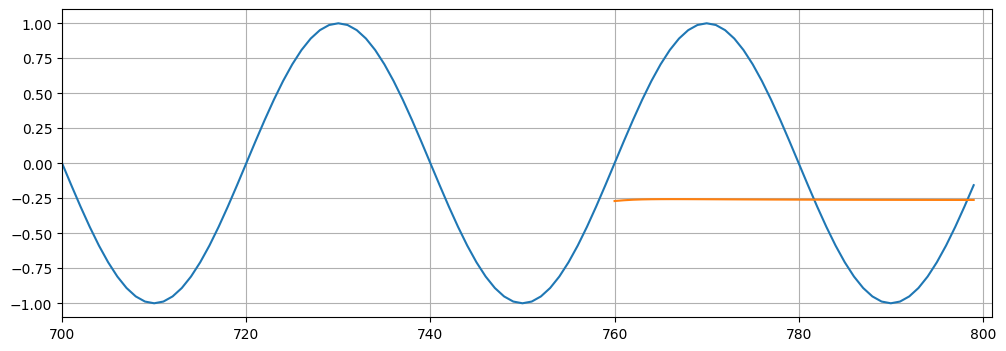

Epoch 3/10 Loss: 0.04197341948747635
Performance on test range: 0.5200702548027039


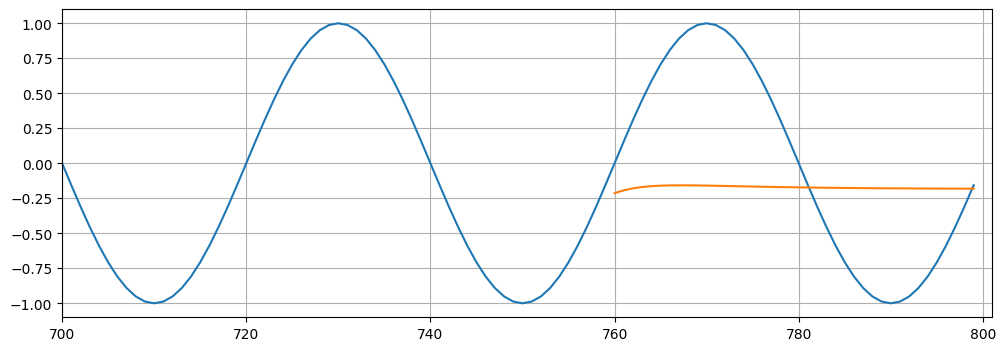

Epoch 4/10 Loss: 0.017842357978224754
Performance on test range: 0.4221588671207428


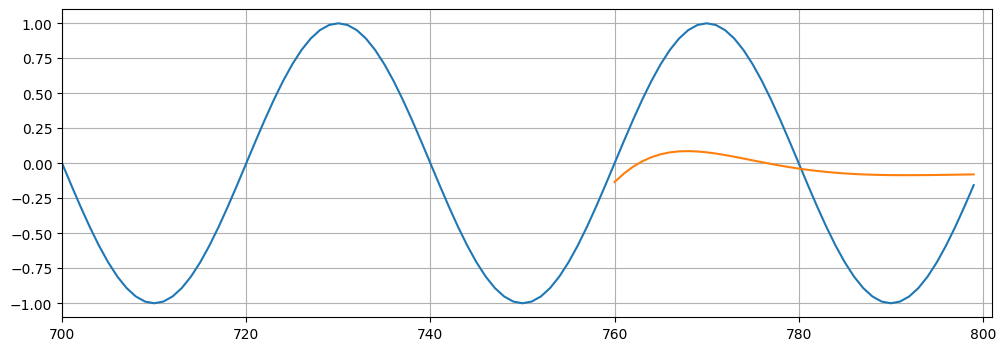

Epoch 5/10 Loss: 0.0028890538960695267
Performance on test range: 0.16624271869659424


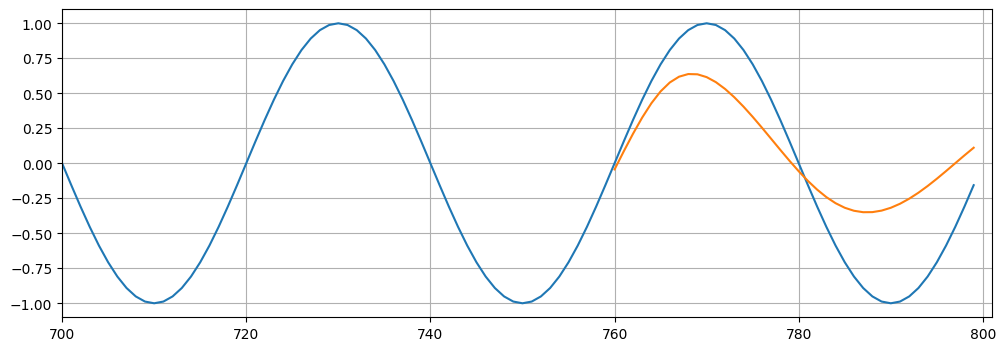

Epoch 6/10 Loss: 0.0003210682771168649
Performance on test range: 0.0305510051548481


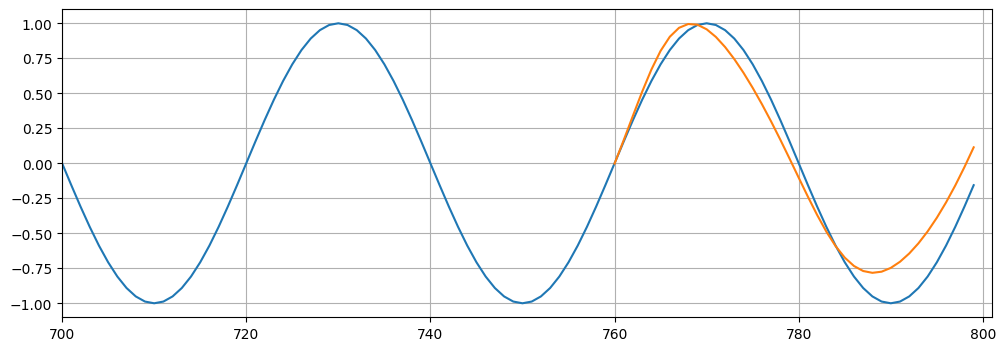

Epoch 7/10 Loss: 0.0001303479220950976
Performance on test range: 0.014989708550274372


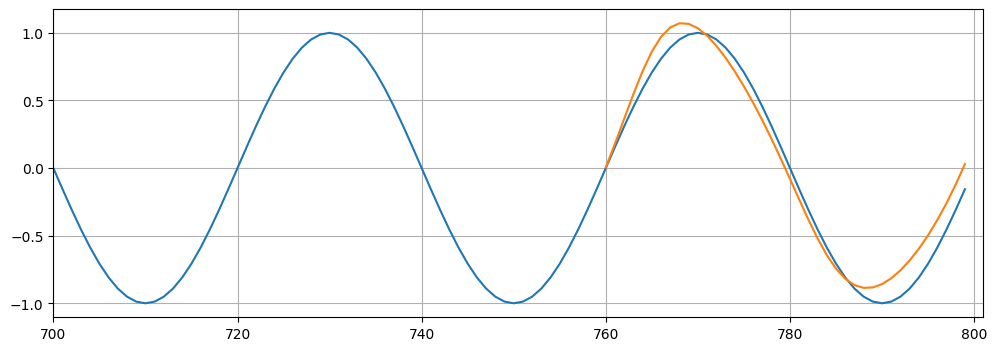

Epoch 8/10 Loss: 0.00012068532669218257
Performance on test range: 0.01185627281665802


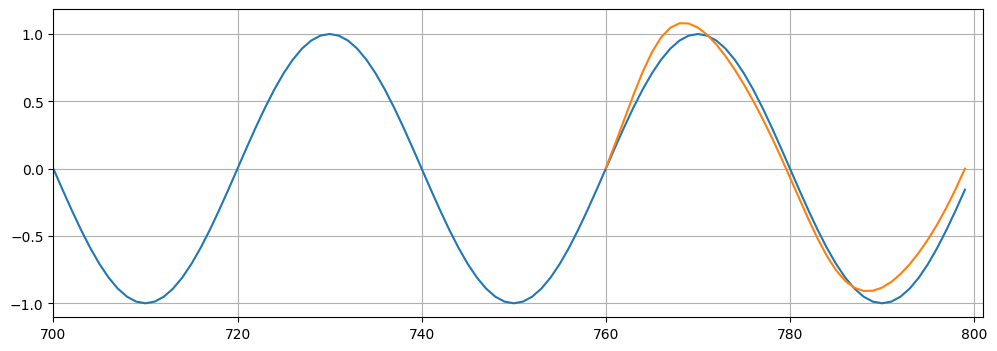

Epoch 9/10 Loss: 0.0001271718501811847
Performance on test range: 0.010163594037294388


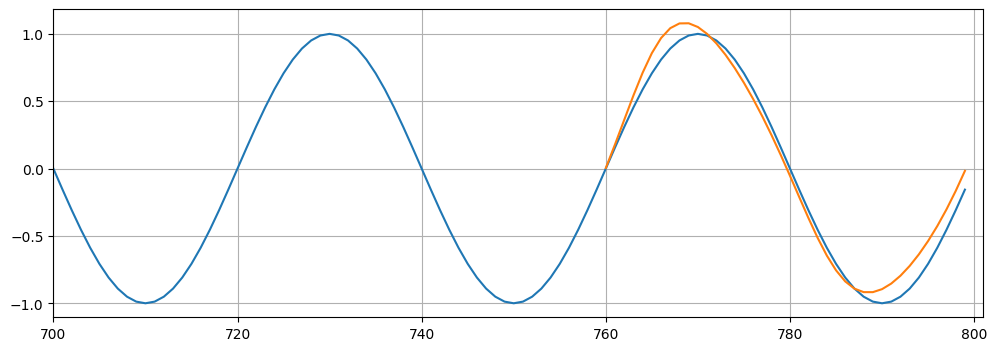

Epoch 10/10 Loss: 0.00013256483362056315
Performance on test range: 0.008897281251847744


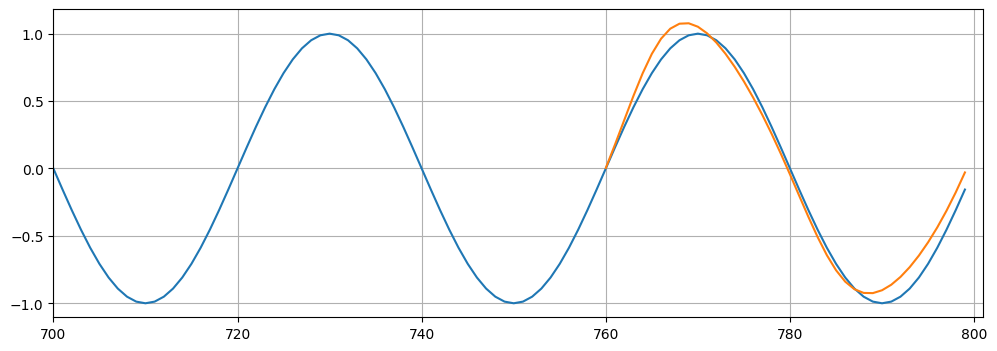

In [17]:
epochs = 10
future = 40

for i in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
    print(f'Epoch {i+1}/{epochs} Loss: {loss.item()}')
    preds = list(train_set[-window_size:].numpy())
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
    
    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f'Performance on test range: {loss}')

    plt.figure(figsize = (12,4))
    plt.xlim(700, 801);
    plt.grid(True);
    plt.plot(y.numpy());
    plt.plot(range(760, 800), preds[-window_size:]);
    plt.show();

In [18]:
epochs = 15
window_size = 40
future = 40

all_data = input_data(y, window_size)
len(all_data)

760

In [19]:
import time
start_time = time.time()

for i in range(epochs):
    for seq, y_train in all_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f'Epoch {i+1}/{epochs} Loss: {loss.item()}')

total_time = time.time() - start_time
print(total_time/60)

Epoch 1/15 Loss: 0.00013519309868570417
Epoch 2/15 Loss: 0.00013507808034773916
Epoch 3/15 Loss: 0.0001329432416241616
Epoch 4/15 Loss: 0.00012939763837493956
Epoch 5/15 Loss: 0.00012492107634898275
Epoch 6/15 Loss: 0.00011986723984591663
Epoch 7/15 Loss: 0.0001145126880146563
Epoch 8/15 Loss: 0.0001090491350623779
Epoch 9/15 Loss: 0.00010361685417592525
Epoch 10/15 Loss: 9.831006900640205e-05
Epoch 11/15 Loss: 9.319310629507527e-05
Epoch 12/15 Loss: 8.830697333905846e-05
Epoch 13/15 Loss: 8.367121336050332e-05
Epoch 14/15 Loss: 7.92967839515768e-05
Epoch 15/15 Loss: 7.518573693232611e-05
3.50072203874588


# FORECAST INTO UNKNOWN FUTURE

In [ ]:
pred = list(y[-window_size:].numpy())

for i in range(future):
    seq = torch.FloatTensor(torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
    preds.append(model(seq).item())

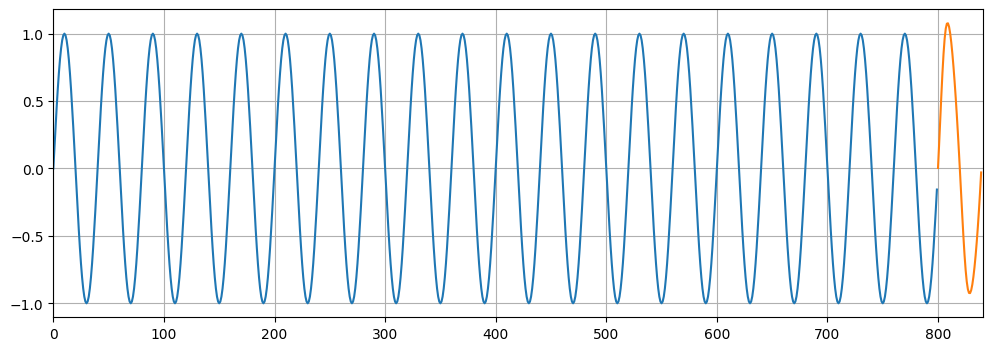

In [20]:
plt.figure(figsize=(12,4));
plt.xlim(0,841);
plt.grid(True);
plt.plot(y.numpy());
plt.plot(range(800, 800+future), preds[-window_size:]);
plt.show();